In [1]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
plt.style.use('lateky')
import numpy as np
import pickle

In [2]:
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
maxwellboltzmann = {"m": 6, "n": -1, "d": np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-2}

# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    perturbations_args=[separatrix],
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.41, -0.7],
    tol=1e-9,
)

# # Adding perturbation after the object is created uses the found axis as center point
pyoproblem.add_perturbation(maxwellboltzmann)

### Finding the X-point
print("\nFinding the X-point\n")

# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
guess = [6.21560891, -4.46981856]
print(f"Initial guess: {guess}")

fixedpoint.compute(guess=guess, pp=0, qq=1, sbegin=4, send=9, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

fixedpoint.compute_all_jacobians()

# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(pyoproblem, fixedpoint, integrator_params=iparams)

# Choose the tangles to work with
manifold.choose(0, 0, signs=[[1,1],[1,1]])

0 - dr : 0.010422282084043258
1 - RZ : [ 6.41409394 -0.69368043]
1 - dr : 6.293042617255254e-06
2 - RZ : [ 6.41409781 -0.69367863]
2 - dr : 9.776471937205409e-12
0 - dr : 9.776471937205409e-12

Finding the X-point

Initial guess: [6.21560891, -4.46981856]
0 - [DeltaR, DeltaZ] : [0.36837511 0.29386843] - dtheta : 0.10126302110849217
0 - [StepR, StepZ]: [-0.02359847 -0.02035975]
1 - RZ : [ 6.19201044 -4.49017831] - rhotheta : [ 3.80298995 -1.62922767]
1 - [DeltaR, DeltaZ] : [-0.16147186 -0.17361706] - dtheta : 0.0378813223042207
1 - [StepR, StepZ]: [0.00554754 0.00265594]
2 - RZ : [ 6.19755798 -4.48752237] - rhotheta : [ 3.80001839 -1.6278111 ]
2 - [DeltaR, DeltaZ] : [-0.01713088 -0.02916531] - dtheta : 0.0040314773533278725
2 - [StepR, StepZ]: [ 0.0060078  -0.00828907]
3 - RZ : [ 6.20356577 -4.49581144] - rhotheta : [ 3.80795715 -1.62611193]
3 - [DeltaR, DeltaZ] : [0.00040068 0.00018402] - dtheta : 0.00010239353882202096
3 - [StepR, StepZ]: [ 5.80233393e-05 -1.33428980e-04]
4 - RZ : [ 6

In [10]:
manifold.inner

{'lfs': {'stable': None, 'unstable': None},
 'clinics': [],
 'rfp_s': array([ 6.20362381, -4.49594488]),
 'lambda_s': 0.03497055725537135,
 'vector_s': array([-0.4967489 ,  0.86789431]),
 'rfp_u': array([ 6.20362381, -4.49594488]),
 'lambda_u': 28.595483700719043,
 'vector_u': array([0.74047633, 0.67208244])}

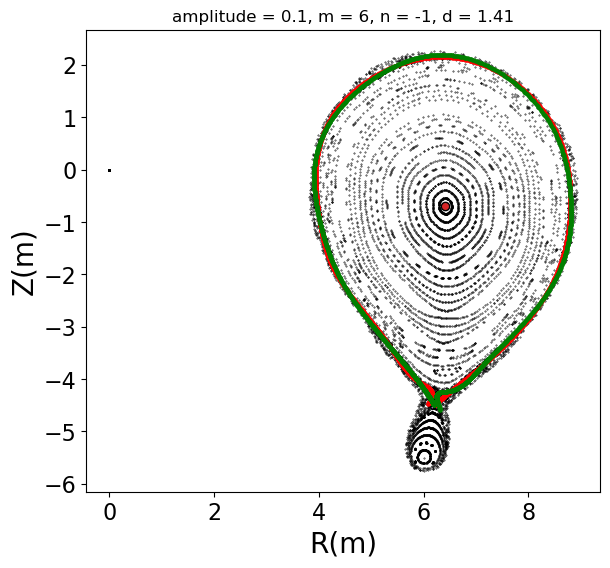

In [53]:
fig = pickle.load(open("manifold_05131749.pkl", "rb"))
ax = fig.gca()

In [ ]:
eps_s_1, eps_u_1 = manifold.find_homoclinic()
bounds_1 = manifold.find_bounds(eps_s_1, eps_u_1)

In [ ]:
bounds_i = np.array(bounds_1)
bounds_i[0][0] = manifold.clinics[-1][1]
bounds_i[1][1] = manifold.clinics[-1][2]
bounds_i = (tuple(bounds_i[0]), tuple(bounds_i[1]))

In [ ]:
bounds_1

In [ ]:
bounds_i

In [ ]:
# i = 1
fund = manifold.fundamental_segment
# guess_i = [bounds_1[0][1]*np.power(manifold.lambda_s, 5/6), bounds_1[1][0]*np.power(manifold.lambda_u, 5/6)]
guess_i = [bounds_1[0][1]*np.power(manifold.lambda_s, 1/2), bounds_1[1][0]*np.power(manifold.lambda_u, 1/2)]
print(f"initial guess: {guess_i}")

In [ ]:
eps_s_i, eps_u_i = manifold.find_homoclinic(*guess_i, bounds = bounds_i, n_s=7, n_u=5, options={"factor": 0.1})

In [12]:
manifold.onworking = manifold.inner

In [13]:
manifold.find_clinics(n_points=2, tol=1e-6)
manifold.order()

2024-05-28 11:40:01 [info     ] Search for minimum of the linear error succeeded, epsilon = 2.10891e-07


2024-05-28 11:40:02 [info     ] Search for minimum of the linear error succeeded, epsilon = 3.10995e-07
2024-05-28 11:40:02 [debug    ] Guess - 2.9098106589881092e-06, 4.291005013586976e-06
2024-05-28 11:40:02 [debug    ] Bounds - ((2.1089149523112986e-07, 6.0305128132073485e-06), (3.109952260079285e-07, 8.893005253181881e-06))
2024-05-28 11:40:02 [debug    ] n_s, n_u - 7, 6
2024-05-28 11:40:02 [debug    ] Inside : (2.9098106589881097e-06, 4.291005013586974e-06)
2024-05-28 11:40:02 [debug    ] Returns - (array([8.50562287, 0.7452565 ]), array([5.31874375, 1.94128286]), array([ 3.18687912, -1.19602635]))
2024-05-28 11:40:02 [debug    ] Inside : (2.9098106589881097e-06, 4.291005013586974e-06)
2024-05-28 11:40:02 [debug    ] Returns - (array([8.50562287, 0.7452565 ]), array([5.31874375, 1.94128286]), array([ 3.18687912, -1.19602635]))
2024-05-28 11:40:02 [debug    ] Inside : (2.9098106589881097e-06, 4.291005013586974e-06)
2024-05-28 11:40:02 [debug    ] Returns - (array([8.50562287, 0.745

In [14]:
manifold.tunrstile_area()

2024-05-28 11:40:19 [info     ] Forward integration goes beyond stable saddle point.
2024-05-28 11:40:19 [debug    ] rfp: [ 6.20362381 -4.49594488], rz_end: [ 6.20361542 -4.49595245], rz: [ 6.20362292 -4.4959441 ]


2024-05-28 11:40:19 [info     ] Backward integration goes beyond stable saddle point.
2024-05-28 11:40:19 [debug    ] rfp: [ 6.20362381 -4.49594488], rz_end: [ 6.20362555 -4.49594786], rz: [ 6.20362445 -4.49594446]
2024-05-28 11:40:19 [info     ] Potential integration completed for homo/hetero-clinic point of order : 7.860e-07
2024-05-28 11:40:20 [info     ] Forward integration goes beyond stable saddle point.
2024-05-28 11:40:20 [debug    ] rfp: [ 6.20362381 -4.49594488], rz_end: [ 6.20356703 -4.49599641], rz: [ 6.20362172 -4.49594649]
2024-05-28 11:40:20 [info     ] Backward integration goes beyond stable saddle point.
2024-05-28 11:40:20 [debug    ] rfp: [ 6.20362381 -4.49594488], rz_end: [ 6.20362044 -4.49593898], rz: [ 6.2036238  -4.49594458]
2024-05-28 11:40:20 [info     ] Potential integration completed for homo/hetero-clinic point of order : 4.141e-06


array([ 0.03906005, -0.03906005])

In [15]:
manifold.inner["areas"]

array([[ 0.03906005,  0.00100438,  0.00010816],
       [-0.03906005,  0.00100438,  0.00010816]])

In [38]:
potential_integrations = manifold.inner["potential_integrations"]
fwd = np.min([len(pot[0]) for pot in potential_integrations])
bwd = np.min([len(pot[1]) for pot in potential_integrations])
inner_int = [pot[1][:fwd].sum() - pot[0][:bwd].sum() for pot in potential_integrations]

In [41]:
print(inner_int)
inner_int = np.mean(inner_int)

[-5.359252259823307, -5.400881049419743]


In [40]:
inner_int[0]-inner_int[1]

0.04162878959643557

In [52]:
pyoproblem_2.B(results_2[0]) * results_2[0][0]**2

array([-111.56343798, -103.66725286,   -5.05279598])

In [43]:
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}

# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem_2 = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    perturbations_args=[separatrix],
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.41, -0.7],
    tol=1e-9,
)

### Finding the X-point
print("\nFinding the X-point\n")

# set up the integrator for the FixedPoint_2
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300

# set up the FixedPoint_2 object
fixedpoint_2 = FixedPoint(pyoproblem_2, pparams, integrator_params=iparams)

# find the X-point
guess = [6.21560891, -4.46981856]
print(f"Initial guess: {guess}")

fixedpoint_2.compute(guess=guess, pp=0, qq=1, sbegin=4, send=9, tol=1e-10)

if fixedpoint_2.successful:
    results_2 = [list(p) for p in zip(fixedpoint_2.x, fixedpoint_2.y, fixedpoint_2.z)]
else:
    raise ValueError("X-point not found")

fixedpoint_2.compute_all_jacobians()

0 - dr : 0.010422282084043258
1 - RZ : [ 6.41409394 -0.69368043]
1 - dr : 6.293042617255254e-06
2 - RZ : [ 6.41409781 -0.69367863]
2 - dr : 9.776471937205409e-12

Finding the X-point

Initial guess: [6.21560891, -4.46981856]
0 - [DeltaR, DeltaZ] : [0.36812511 0.29366272] - dtheta : 0.10118852692377112
0 - [StepR, StepZ]: [-0.0236111  -0.02026723]
1 - RZ : [ 6.19199781 -4.49008579] - rhotheta : [ 3.80289834 -1.6292324 ]
1 - [DeltaR, DeltaZ] : [-0.161072  -0.1732541] - dtheta : 0.03779092306370524
1 - [StepR, StepZ]: [0.00559025 0.00256556]
2 - RZ : [ 6.19758806 -4.48752024] - rhotheta : [ 3.80001455 -1.62780323]
2 - [DeltaR, DeltaZ] : [-0.01704153 -0.02901229] - dtheta : 0.004010692884596656
2 - [StepR, StepZ]: [ 0.00597728 -0.00824633]
3 - RZ : [ 6.20356534 -4.49576657] - rhotheta : [ 3.80791237 -1.62611269]
3 - [DeltaR, DeltaZ] : [0.00039688 0.00018237] - dtheta : 0.00010142199555973619
3 - [StepR, StepZ]: [ 5.74398542e-05 -1.32091785e-04]
4 - RZ : [ 6.20362278 -4.49589866] - rhotheta

In [33]:
manifold.integrate_single(results[0][::2], 1, ret_jacobian=False, integrate_A = True)

(array([ 6.20362381, -4.49594488]), 12.42609192701053)

In [3]:
manifold.find_homoclinic(2.179774577375764e-07, 3.84907705931755e-06, n_s=7, n_u=6)
manifold.find_homoclinic(1.2560522331587575e-06, 2.388481018696467e-05, n_s=7, n_u=5)

manifold.order()

2024-05-22 23:10:51 [debug    ] Guess - 2.179774577375764e-07, 3.84907705931755e-06
2024-05-22 23:10:51 [debug    ] Bounds - ((2.179774577375764e-07, 6.23313751613312e-06), (3.84907705931755e-06, 0.00011005855123651639))
2024-05-22 23:10:51 [debug    ] n_s, n_u - 7, 6
2024-05-22 23:10:51 [debug    ] Inside : (2.179774577375764e-07, 3.84907705931755e-06)


2024-05-22 23:10:51 [debug    ] Returns - (array([5.32142803, 1.94222088]), array([5.44360053, 1.99350899]), array([-0.1221725 , -0.05128811]))
2024-05-22 23:10:51 [debug    ] Inside : (2.179774577375764e-07, 3.84907705931755e-06)
2024-05-22 23:10:51 [debug    ] Returns - (array([5.32142803, 1.94222088]), array([5.44360053, 1.99350899]), array([-0.1221725 , -0.05128811]))
2024-05-22 23:10:51 [debug    ] Inside : (2.179774577375764e-07, 3.84907705931755e-06)
2024-05-22 23:10:51 [debug    ] Returns - (array([5.32142803, 1.94222088]), array([5.44360053, 1.99350899]), array([-0.1221725 , -0.05128811]))
2024-05-22 23:10:51 [debug    ] Inside : (2.1797750756004382e-07, 3.84907705931755e-06)
2024-05-22 23:10:51 [debug    ] Returns - (array([5.32142828, 1.94222099]), array([5.44360053, 1.99350899]), array([-0.12217225, -0.051288  ]))
2024-05-22 23:10:51 [debug    ] Inside : (2.179774577375764e-07, 3.849077774410186e-06)
2024-05-22 23:10:51 [debug    ] Returns - (array([5.32142803, 1.94222088])

In [ ]:
manifold.clinics

In [ ]:
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(manifold.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_s, n_u = 10, 10
    
    hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)
    hu_i = manifold.integrate(manifold.rfp_u + eps_u_i * manifold.vector_u, n_u, 1)
    # ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="purple", zorder=10)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

In [ ]:
fig.set_size_inches(12, 12)
ax.set_xlim(3.5, 9.2)
ax.set_ylim(-6, 2.5)
ax.set_title('')
ax.set_xlabel(r'R [m]')
ax.set_ylabel(r'Z [m]')

ax.legend()


fig

In [ ]:
pickle.dump(fig, open("perturbed-6-1-0.1-general.pkl", "wb"))

In [ ]:
eps_s, eps_u = manifold.fundamental_segment
eps_s, eps_u = eps_s[0], eps_u[0]

In [ ]:
manifold.compute(eps_s=eps_s, eps_u=eps_u, neps=40)

In [ ]:
rh = manifold.integrate_single(manifold.rfp_u + manifold.clinics[1][0]*manifold.vector_u, 3, 1, ret_jacobian=False)

In [ ]:
default = {
    "markersize": 2,
    "fmt": "-x",
    "colors": ["red", "blue"],
}

area_calc = []
dirdict = [manifold.unstable["+"], manifold.stable["+"]]

for i, out in enumerate(dirdict):
    tmpcolor = default["colors"][i]
    
    if i == 0:
        area_calc.append(out[44:80, 3])
        out = out[44:80, 3]
    else:
        area_calc.append(out[:42, 9])
        out = out[:42, 9]

    out = out.T.flatten()

    if i==0:
        out = np.concatenate((rh, out))
    else:
        out = np.concatenate((out, rh))

    ax.plot(
        out[::2],
        out[1::2],
        default["fmt"],
        color='black',
        markersize=6,
        linewidth=2
    )

In [ ]:
path1 = area_calc[0].reshape(-1,2)
path2 = area_calc[1].reshape(-1,2)

path1 = np.vstack((rh, path1))
path2 = np.vstack((path2, rh))

In [ ]:
path1.T

In [ ]:
path2.T

In [ ]:
# Concatenate the paths to form a loop
loop = np.vstack((path1[1:], path2[1:]))

x = loop[:, 0]
y = loop[:, 1]
area = 0.5*np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

In [ ]:
ax.scatter(6.7913, -4.0464, color='black', label='$B^\phi$ evaluation point')

In [ ]:
ax.legend()
ax.set_xlim(6, 7.3)
ax.set_ylim(-4.6, -3.6)
fig

In [ ]:
pickle.dump(fig, open("perturbed-6-1-0.1-closeup.pkl", "wb"))

In [ ]:
pyoproblem.B([6.7913, 0., -4.0464])

In [ ]:
flux1 = area * pyoproblem.B([6.7913, 0., -4.0464])[1] * 6.7913
flux1

#### Area by computation

In [4]:
areas, potential_integrations, history = manifold.resonance_area()

2024-05-22 23:11:07 [info     ] Forward integration goes beyond stable saddle point.
2024-05-22 23:11:07 [debug    ] rfp: [ 6.20362381 -4.49594488], rz_end: [ 6.20359492 -4.4959711 ], rz: [ 6.20362269 -4.49594561]
2024-05-22 23:11:07 [info     ] Backward integration goes beyond stable saddle point.
2024-05-22 23:11:07 [debug    ] rfp: [ 6.20362381 -4.49594488], rz_end: [ 6.2036498  -4.49599027], rz: [ 6.20362483 -4.49594637]
2024-05-22 23:11:07 [info     ] Potential integration completed for homo/hetero-clinic point of order : 4.141e-06
2024-05-22 23:11:08 [info     ] Forward integration goes beyond stable saddle point.
2024-05-22 23:11:08 [debug    ] rfp: [ 6.20362381 -4.49594488], rz_end: [ 6.20361548 -4.49595239], rz: [ 6.20362292 -4.49594409]
2024-05-22 23:11:08 [info     ] Backward integration goes beyond stable saddle point.
2024-05-22 23:11:08 [debug    ] rfp: [ 6.20362381 -4.49594488], rz_end: [ 6.20362542 -4.49594764], rz: [ 6.20362445 -4.49594445]
2024-05-22 23:11:08 [info   

In [5]:
areas

array([-0.03909455,  0.03909455])

In [6]:
manifold.areas

array([[-3.90945477e-02,  1.00637887e-03,  9.60206183e-05],
       [ 3.90945477e-02,  1.00637887e-03,  9.60206183e-05]])

In [23]:
print(manifold.areas[0][0], manifold.areas[0][1], manifold.areas[0][2])

-0.039094547687099634 0.0010063788683591923 9.602061826916988e-05


In [25]:
print(abs(manifold.areas[0][1]/manifold.areas[0][0]), abs(manifold.areas[0][2]/manifold.areas[0][0]))

0.025742179610669234 0.0024561127817026678


In [ ]:
(flux1 - manifold.areas[0])/flux1

### Errors and convergence

In [7]:
areas

array([-0.03909455,  0.03909455])

In [ ]:
potential_integrations

Text(0, 0.5, 'Potential integration')

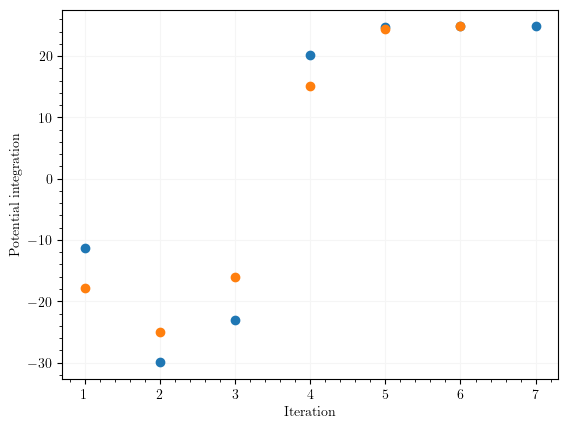

In [20]:
fig, ax = plt.subplots()
for pot in potential_integrations:
    ns = min(len(pot[0]), len(pot[1]))
    ax.scatter(1+np.arange(ns), pot[0][:ns]-pot[1][:ns], zorder=10)

plt.xlabel('Iteration')
plt.ylabel('Potential integration')